In [1]:
import fireworks
from fireworks import ic, nbodylib, evolve_and_plot
from fireworks.ic import *
from fireworks.nbodylib import *
from fireworks.evolve_and_plot import *
from fireworks.nbodylib.integrators import *
from fireworks.nbodylib.dynamics import *
from fireworks.nbodylib.potentials import *
from fireworks.nbodylib.timesteps import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

## A. Implement integrators:

Implemented integrator_euler, integrator_verlet, integrator_runge_kutta in integrators.py and implemented test in test_integrator.py.

## B. Total energy:

Implemented Ekin, Epot, Etot in Particles class.

## C Let’s stay together

Circular orbit: Initialise two stars in a circular
orbit using the initial condition generator fireworks.ic.ic_two_body.
Read the documentation to understand how to use the function.

Once the initial conditions are generated, estimate the binary Period,Tperiod (remember we are using NBody units with G=1).

Then, develop an interactive method to evolve the binary system from 0 to 10x Tperiod. For this task, you have to combine the integrators you
developed for task A, and the direct force estimators you developed for assignment 2. Test different constant timesteps and monitor the
total energy during the evolution. For this task you have to use at least three integrators: the 1st order Euler integrator, the 2nd order
leapfrog integrator and one higher-order integrator (e.g. Runge-Kutta or Hermite). 


Produce the following plots:

1. plot the path of the two particles in the x-y plane. Produce a
panel for each integrators you used.
2. plot the evolution of the total energy as function of time. Use a
different curve for the different integrators.
3. plot some measure of the energy error (e.g. maximum energy
error, average energy error.. etc) as function of the used
timestep.

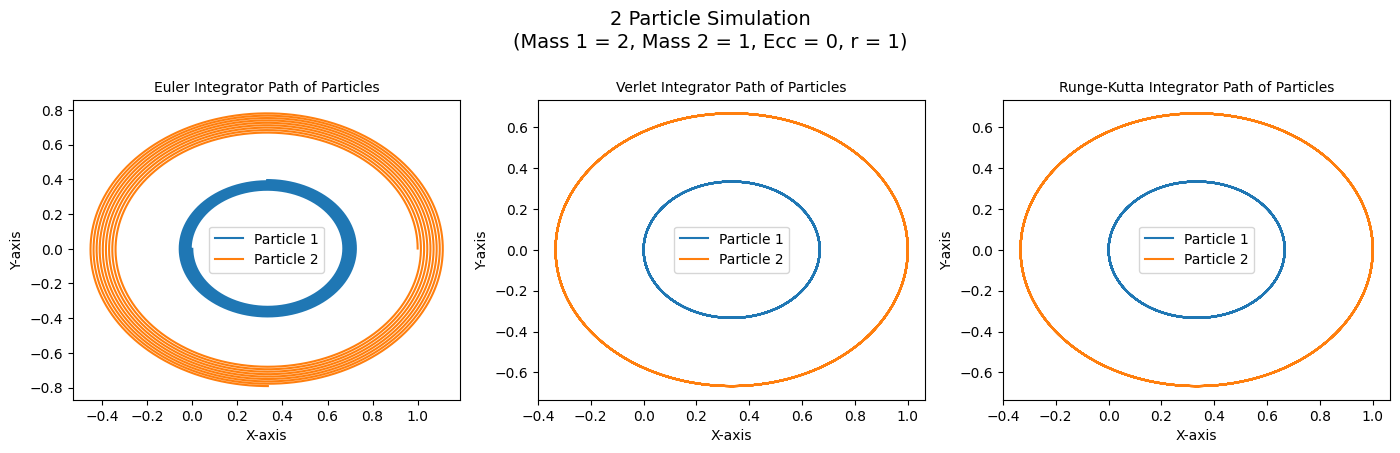

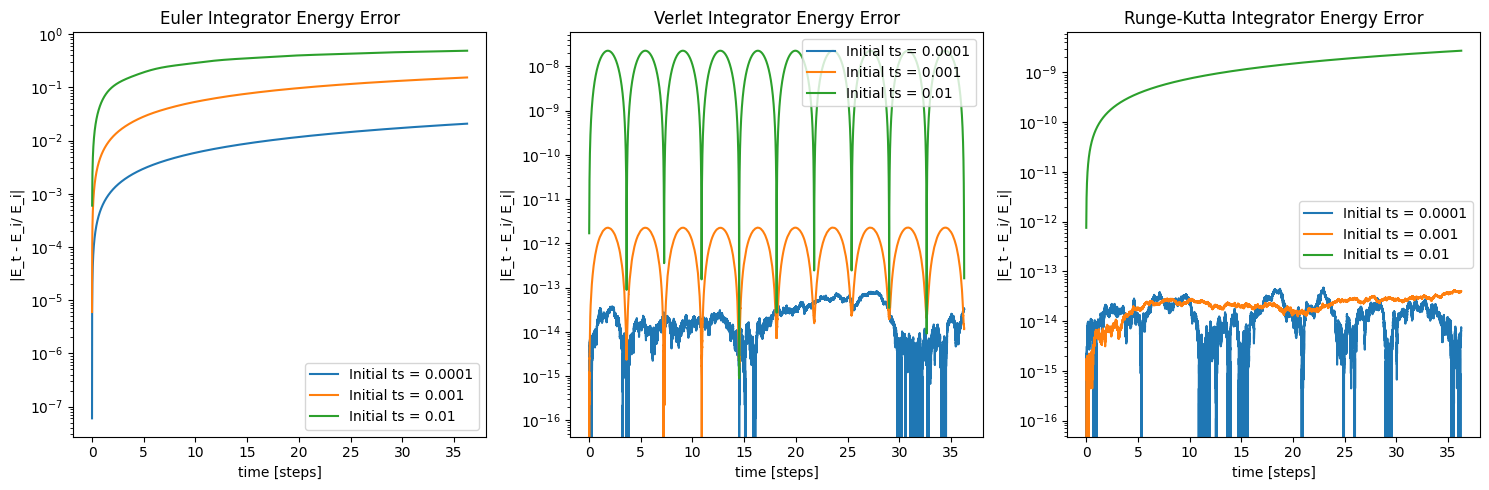

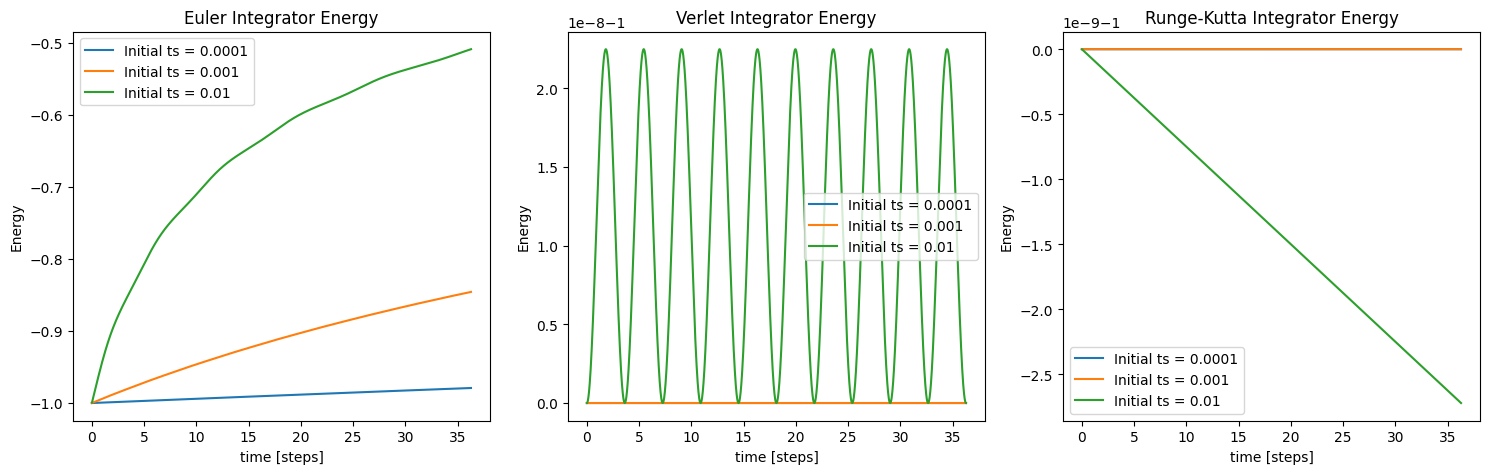

In [5]:
integrators = {"Euler Integrator": integrator_euler, "Verlet Integrator": integrator_verlet, "Runge-Kutta Integrator": integrator_runge_kutta}
timestep = 0.001
timesteps = [0.0001,0.001,0.01]
masses = [2,1]
eccentricities = [0]
radii = [1]
num_particles = 2
animation_num_dim = 2
animate_particle_path = animate_particle_path_2D
dynamics = acceleration_direct_vectorised
adaptive_timestep_function = None
animation_name ="2_particles_RK_ecc_0.gif"
fast_sim = False

evolve_and_plot_system(integrators, timestep, timesteps, masses, eccentricities[0], radii, num_particles, animate_particle_path, dynamics, animation_name, adaptive_timestep_function, fast_sim)


## Comments

We are considering a **circular orbit**, i.e. the simplest situation for a two-body simulation. The results are in line with the theoretical expectations.
1. *Euler Integrator*: it is a first order integrator and its global error scales as $O(h)$. It can be seen how the semi-major axis is growing, hence the energy is not conserved and the integration is not too accurate. This is confirmed by the trend of the energy over time, that is increasing, especially when dealing with a larger timestep. To get a more precise shape of the orbit, a solution might be considering a smaller timestep. Nevertheless, the drift from the optimal circular shape will happen anyway if we increase the time of integration, so it is only a matter of postponing it. Analyzing the evolution of the error of the energy, it increases over time and for each order of magnitude we decrease the timestep $h$, we obtain a change in the energy value of the same order, as expected. The errors reached are of the order of $10^{-1}$, confirming the worst performance within the integrators we implemented.
2. *Velocity Verlet Integrator*: it is of second order, built as a combination of kick and drift steps; its global error scales as $O(h^2)$. It has high accuracy, as it can be seen from the shape of the orbit. The symplectic property implies the conservation of energy in the phase space: this is clear from the plot of the energy over time, it remains constant for $h=0.001, 0.0001$, while it is oscillating around a constant value for $h=0.01$. The fluctuations are happening in a small range, so everything falls within expectations. The long-term stability of the system is also confirmed by the trend of the error, which for the two "larger" timesteps is having periodic oscillations, while for a timestep of $h= 0.0001$ is assesting itself around the order of $10^{-7}$. 
3. *Runge-Kutta Integrator*: it is of fourth order, thus its global error is of order $O(h^4)$. It is neither time-reversible nor symplectic. The integration of the orbit is accurate, while the energy for larger timesteps appears declining. In this case, when reducing the timestep of one order, we reduce the error of the energy of four orders. Anyway, if reducing further, we are not going to gain a lot since we enter the region affected by the round-off errors and by the machine precision. No further improvements are possible, unless we introduce specific procedures to prevent the final steps from these errors. The accuracy of this integrator is demonstrated by the evolution of the error, that remains constant (for $h=0.001, 0.0001$) or oscillates (for $h=0.01$) around values of the order of $10^{-12}$.

## Part D Come closer, darling!

#### NOTE: For this section to reduce computational time we implemented fast_sim = True. This samples every n times instead of every t in the time array, speeding up computational times

Eccentric orbits: repeat the Task C testing eccentric orbits: 

e=0.5, e=0.9 and e=0.99. 

In addition to the implemented integrators, for this task use also the integrator integrator_tsunamiavailable in the submodule fireworks.nbodylib.integrators (see the documentation). 
This integrator is a wrapper of the code TSUNAMI. TSUNAMI is a N-body integrator implementing the Mikkola chain regularisation. 
Using this integrator,you can compare the results/performance of the integrators you implemented with respect to a code implementing regularisation algorithm. 
In order to improve the results of your implemented integrators implement one or more adaptive timestep strategies. 
The function returning the adaptive timestep needs to be implemented in the submodule fireworks.nbodylib.timesteps. 
Follow the instructions reported in the submodule and the template function adaptive_timestep_simple. 
To complete the task add at least one adaptive timestep function and test it replicating the plots of the task C. 
Remember to evolve the system also using the TSUNAMI integrator. 
Comment the results you obtained. To complete the taskupload in Moodle the used scripts, the plots, and your comments (you can
also upload directly a notebook with all requested information).

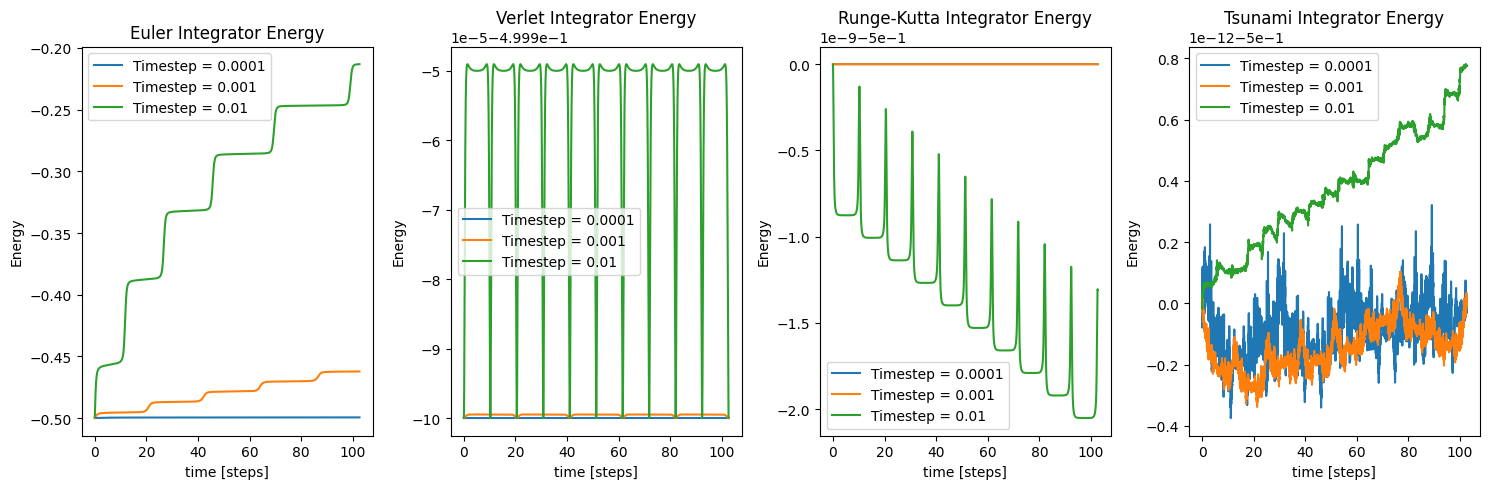

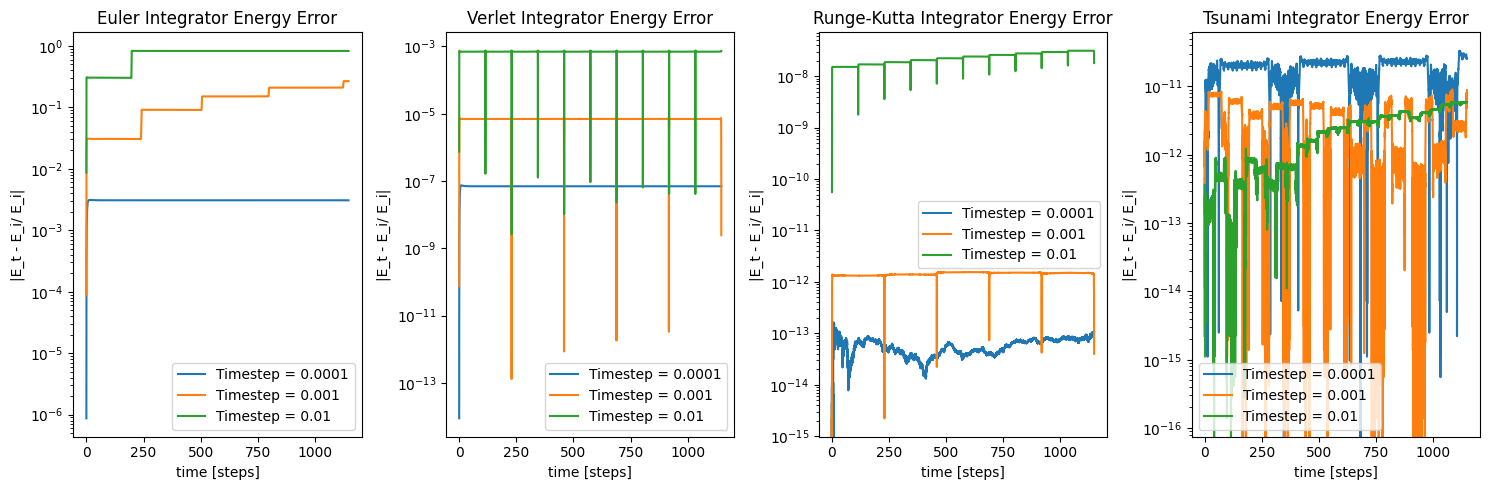

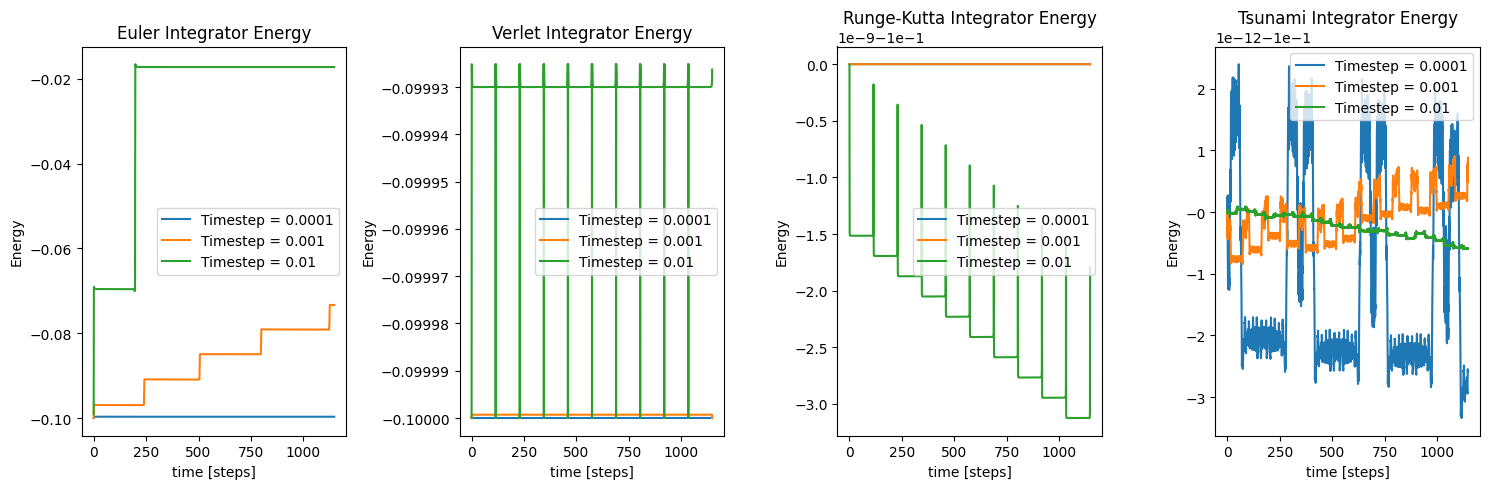

: 

In [2]:
integrators = {"Euler Integrator": integrator_euler, "Verlet Integrator": integrator_verlet, "Runge-Kutta Integrator": integrator_runge_kutta, "Tsunami Integrator": integrator_tsunami}
timestep = 0.001
timesteps = [0.0001,0.001,0.01]
masses = [2,1]
eccentricities = [0.5, 0.90, 0.99]
radii = [1]
num_particles = 2
animation_num_dim = 2
animate_particle_path = animate_particle_path_2D
dynamics = acceleration_direct_vectorised
adaptive_timestep_function = None
fast_sim = True

for ecc in eccentricities:

    animation_name =f"2_particles_RK_ecc_{ecc}.gif"

    evolve_and_plot_system(integrators, timestep, timesteps, masses, ecc, radii, num_particles, animate_particle_path, dynamics, animation_name, adaptive_timestep_function, fast_sim)



#### Adaptive timestep

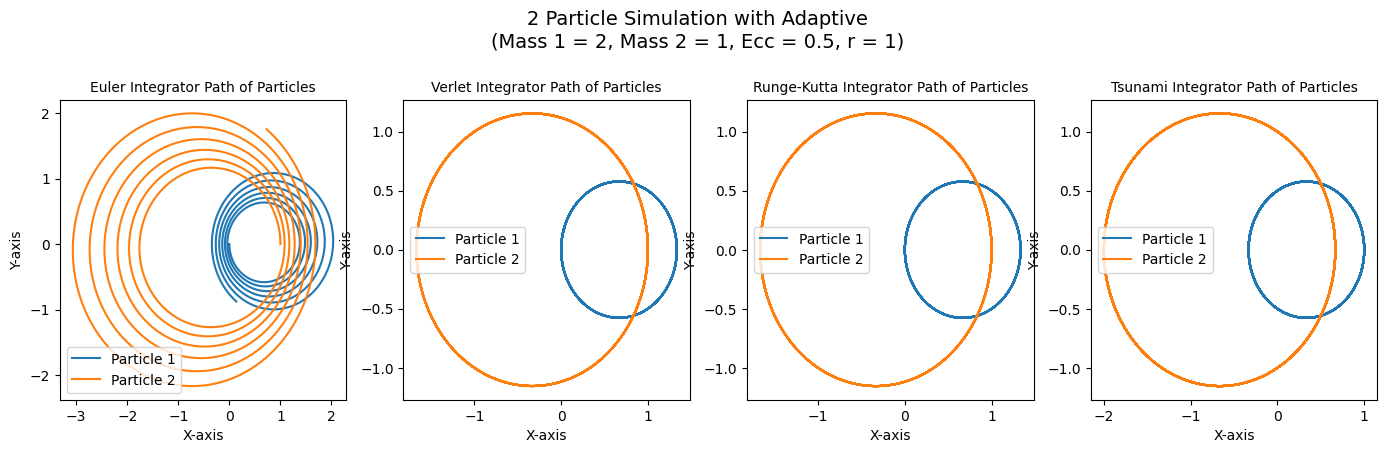

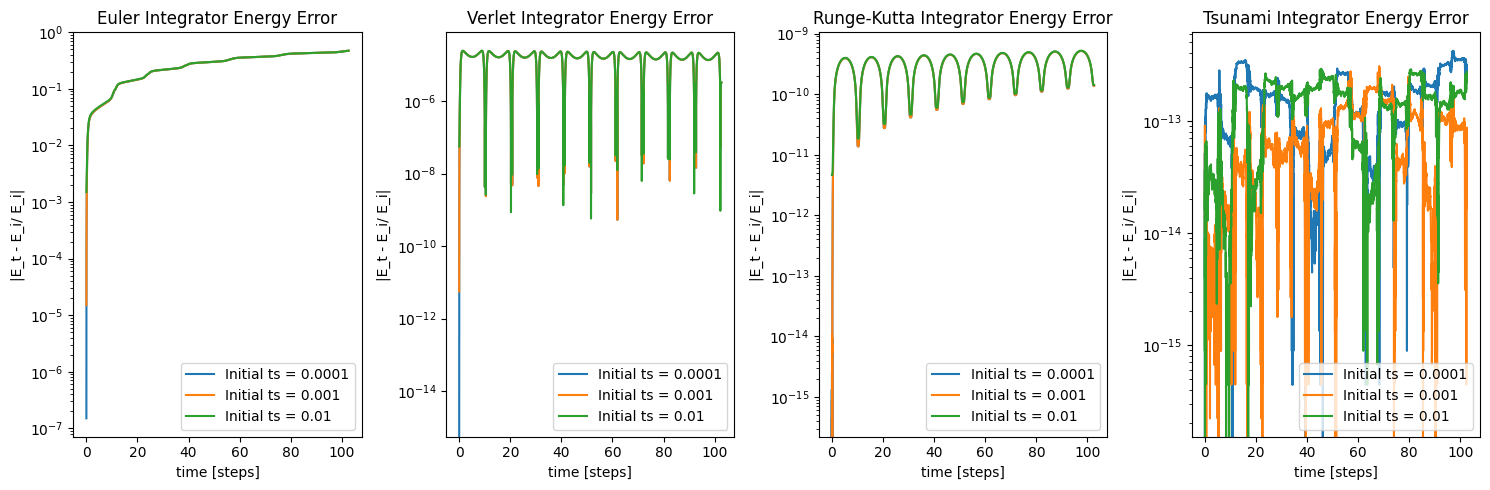

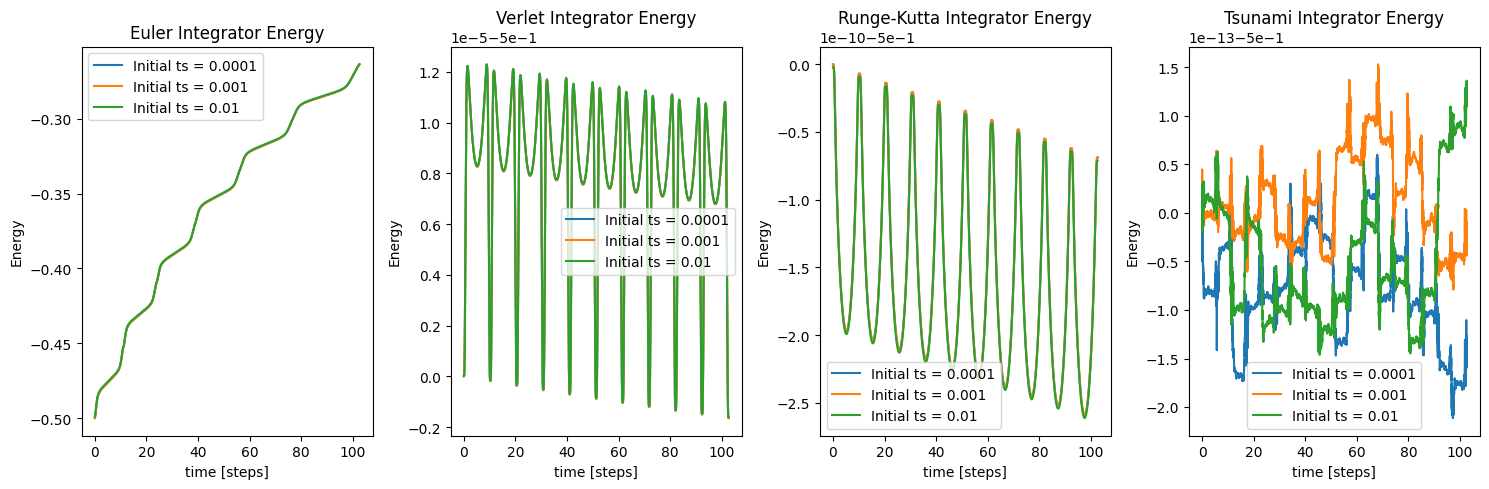

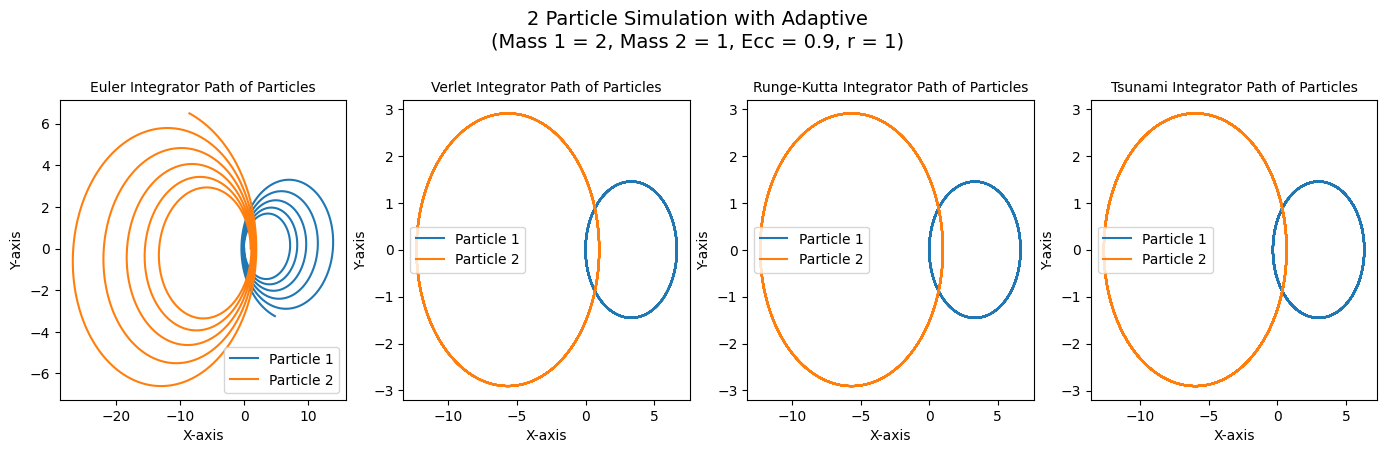

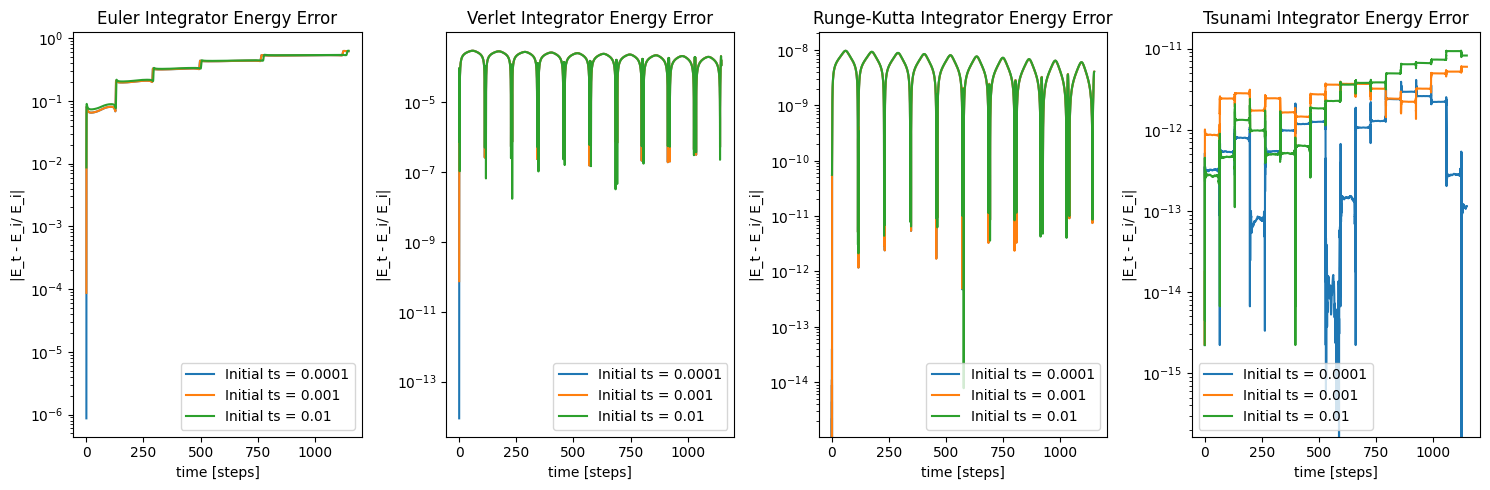

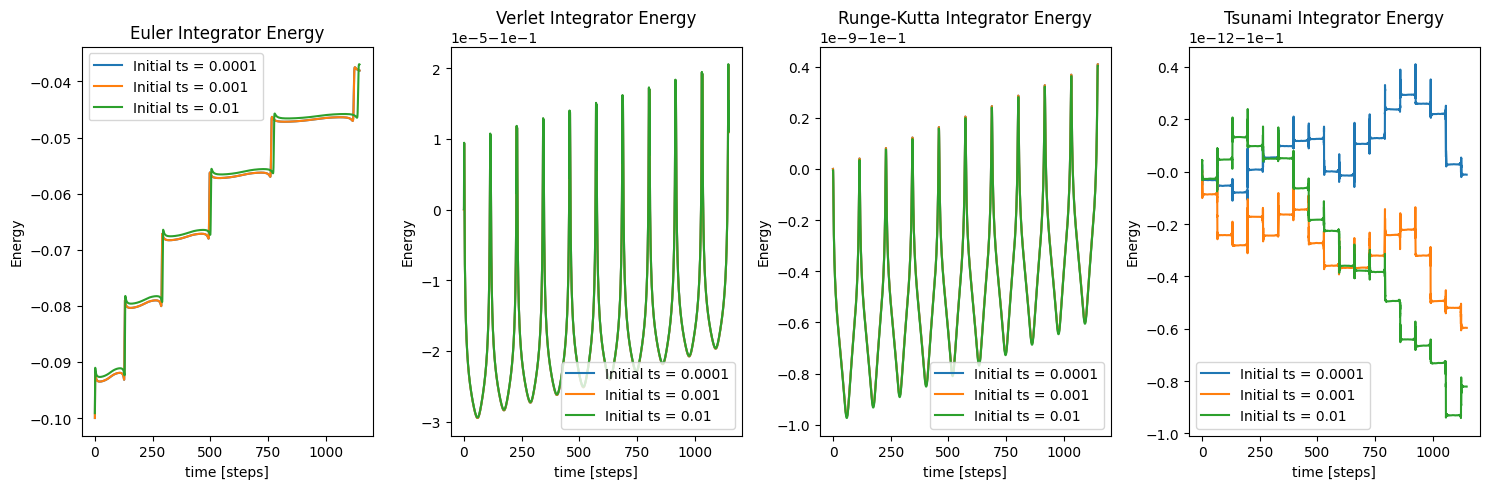

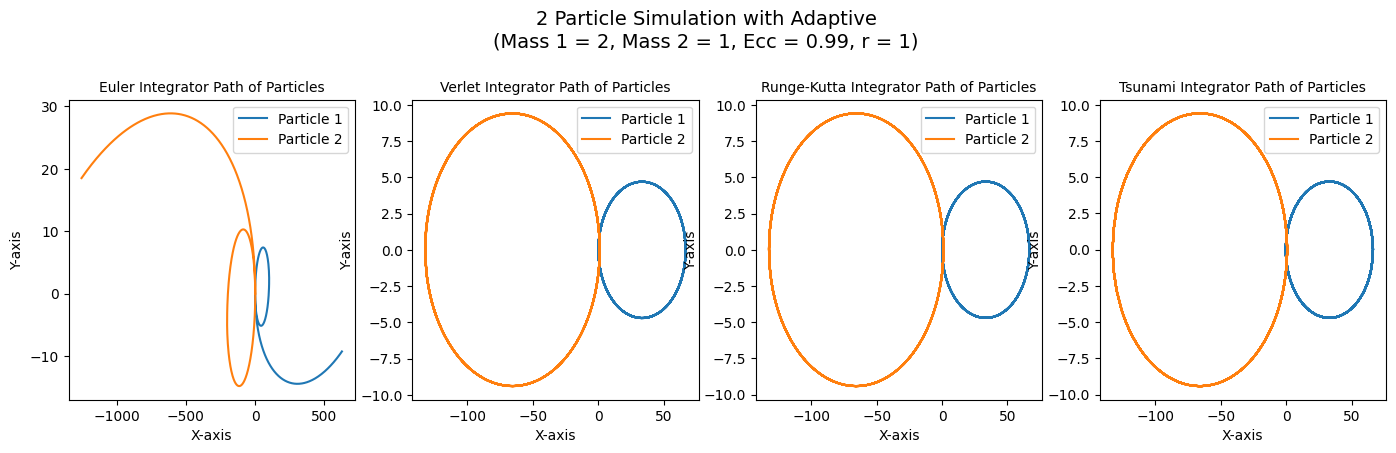

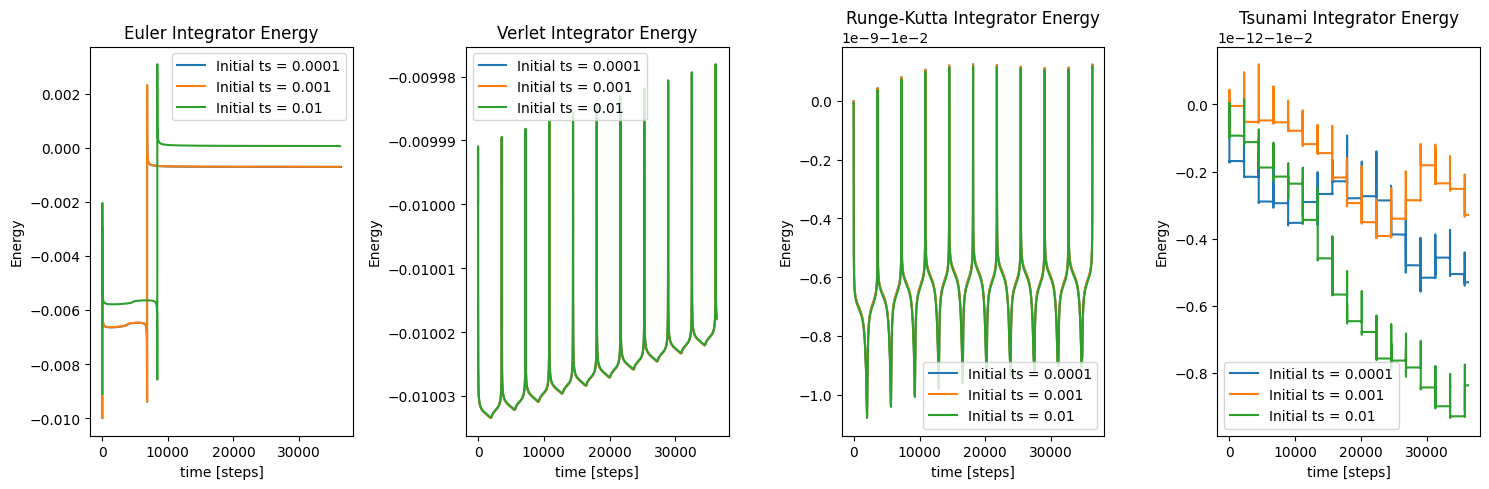

In [2]:
integrators = {"Euler Integrator": integrator_euler, "Verlet Integrator": integrator_verlet, "Runge-Kutta Integrator": integrator_runge_kutta, "Tsunami Integrator": integrator_tsunami}
timestep = 0.001
timesteps = [0.0001,0.001,0.01]
masses = [2,1]
eccentricities = [0.5, 0.90, 0.99]
radii = [1]
num_particles = 2
animation_num_dim = 2
animate_particle_path = animate_particle_path_2D
dynamics = acceleration_direct_vectorised
adaptive_timestep_function = adaptive_timestep_simple_1
fast_sim = False

for ecc in eccentricities:

    animation_name =f"2_particles_RK_ecc_{ecc}_adaptive.gif"
    
    evolve_and_plot_system(integrators, timestep, timesteps, masses, ecc, radii, num_particles, animate_particle_path, dynamics, animation_name, adaptive_timestep_function, fast_sim)



## Comments
We consider now a less trivial case of a two-body simulation, the **elliptic orbit**. The relative position between the two particles is not constant: the difference between the gravitational forces exerted is varying a lot during the orbit, reaching the extremes when the bodies are at the closest approach (_perihelion_) and at the furthest distance (_aphelion_). The angular momentum is not conserved in an eccentric orbit; it varies as the bodies move along the elliptical path. This can be visualized easily thanks to the animation we have built. We deal with three different values of eccentricities: one intermediate ($e=0.5$) and two large values ($e=0.9, 0.99$). Close encounters between particles during certain points in their orbits lead to sudden, large forces and potentially cause numerical instabilities. A useful technique to deal with simulations with high eccentricities could be to introduce a softening parameter (we set it equal to $10^{-6}$), in order to avoid issues such as the orbits drifting away. 

Using an **adaptive timestep** is another effective technique for handling eccentric orbits. It adjusts the size of the time steps based on the characteristics of the system during the simulation. When the system undergoes rapid changes, such as during close encounters, the adaptive timestep algorithm takes a smaller timestep to capture the evolving dynamics more accurately. In regions where the system dynamics are relatively smooth and predictable, the adaptive timestep can be larger, leading to more efficient simulations. This implementation is also a way to balance the need for accuracy with computational efficiency. In regions where fine time resolution is essential, smaller timesteps are used, while in more stable regions, larger timesteps reduce computational costs. We confirmed this by realizing the consistent difference in the run-time with respect to the previous code block.

We implemented the timestep as follows:
$ h_{i+1} = \eta \min_i \sqrt{\frac{|\vec{r_i}|}{|\vec{a_i}|}} $
where $\eta$ is a tunable parameter, set as one of the previous timesteps (in our case $\eta=0.01$). In such way, we link the scale of evolution of the system with the variation of the phase-space properties. We have compared the results of the integrators implemented with respect to a code implementing regularisation algorithm, the TSUNAMI code, which can be considered as our ground truth. We can observe, e.g. for the Euler method, how the realization of the orbit is improved and done with fewer integration steps. For the other integrators, the shape remains as before, since it was already well optimized. In case of the Verlet integrator, we experience the loss of its symplectic properties, that are preserved as long as the time-step remains constant. Regarding the evolution of the energy error, we can see that, even though the initial time step is different, the values around which the error approximately assests are close or overlapping in some cases. This suggests that the implementation is working towards a tradeoff between the optimization of the orbit and computational efficience. Nevertheless, in the TSUNAMI case the evolution is filled with more fluctuations, that are not taken in consideration by the other integrators in our simple configuration. To gain more efficience, certain integrators might require a fine-tuning of the parameters to achieve a better performance.

### Part E

(Optional) This relation is a mess!, The “triangle” problem: the
triple triangle configuration consists in three objects placed at the
vertices of a triangle and starting with velocity=0. Given the initial null
velocity, the angular momentum of the systems is also 0. A null
angular momentum means that the particles can reach very small
separations. This problem is therefore often used as a stress test for
collision N-body codes. To solve this task evolve the following system
for tevolve=65:
• Particle 1: mass=3., initial position = [1,3,0], initial velocity =
[0,0,0]
• Particle 2: mass=4., initial position = [-2,-1,0], initial velocity =
[0,0,0]
• Particle 3: mass=5., initial position = [1,-1,0], initial velocity =
[0,0,0]
	 	 Notice: all the units are N-body units.
As first step, evolve this system with the TSUNAMI integrator. Then try 	 

reproduce the TSUNAMI results as much as you can using the
integrators you developed integrators and a combination of softening and
adaptive timestep. Compare the energy evolution in the TSUNAMI integrator
and the one obtained with the other integrators. (This in an optional task, so it
is not necessary to upload something in Moodle. However, if you want me to
check and give comments on your results, upload plots and script related to this
task in Moodle).

/root/miniconda3/lib/python3.10/site-packages/fireworks/evolve_and_plot.py:165: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes[i].set_yscale('log')


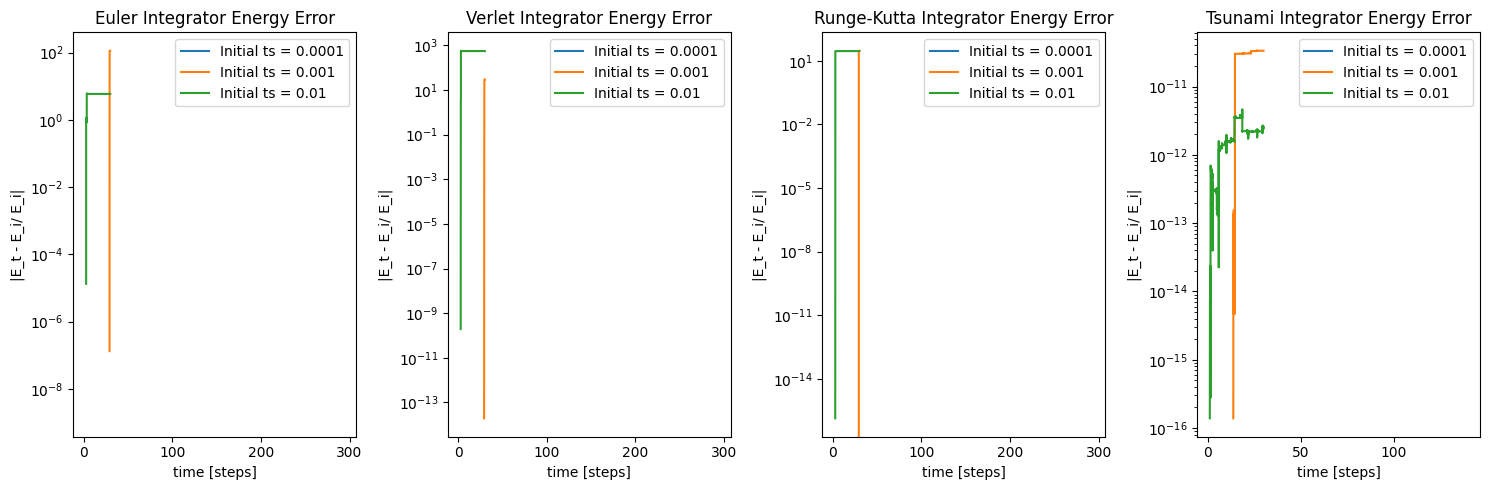

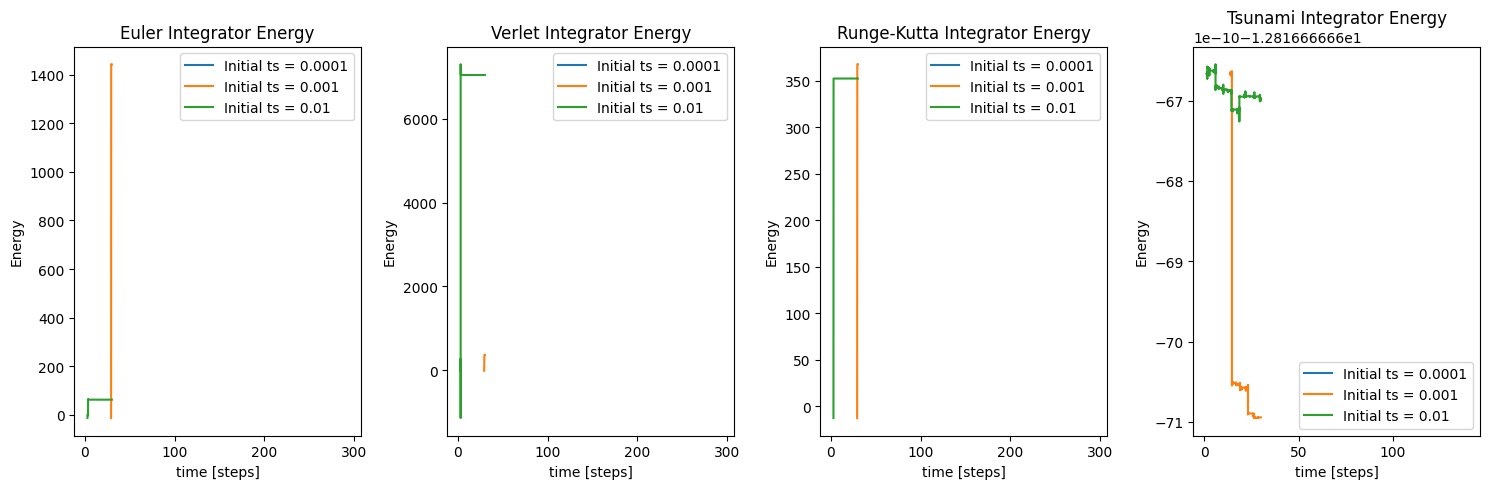

In [3]:
integrators = {"Euler Integrator": integrator_euler, "Verlet Integrator": integrator_verlet, "Runge-Kutta Integrator": integrator_runge_kutta, "Tsunami Integrator": integrator_tsunami}
timestep = 0.001
timesteps = [0.0001,0.001,0.01]
masses = [3,4,5]
eccentricities = [0,0,0]
radii = [1,1,1]
num_particles = 3
animate_particle_path = animate_particle_path_2D
dynamics = acceleration_direct_vectorised
adaptive_timestep_function = adaptive_timestep_simple_1
animation_name ="3_particles_Tsunami_Integrator_with_adaptive_ts.gif"
fast_sim = False

evolve_and_plot_system(integrators, timestep, timesteps, masses, eccentricities, radii, num_particles, animate_particle_path, dynamics, animation_name, adaptive_timestep_function, fast_sim)
